In [27]:
from radmc3dPy import *
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('vedant')

In [46]:
lumfact = 1e+23
distfact = 1/(1000 / 1.05)**2

wls = np.linspace(7.5, 18)
c1 = 50
c2 = -2.5
jwst_sn = c1 + c2*wls

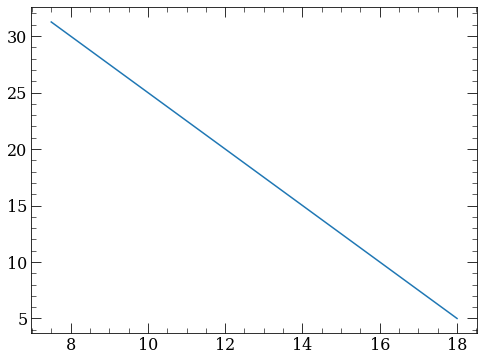

In [47]:
plt.plot(wls, jwst_sn)

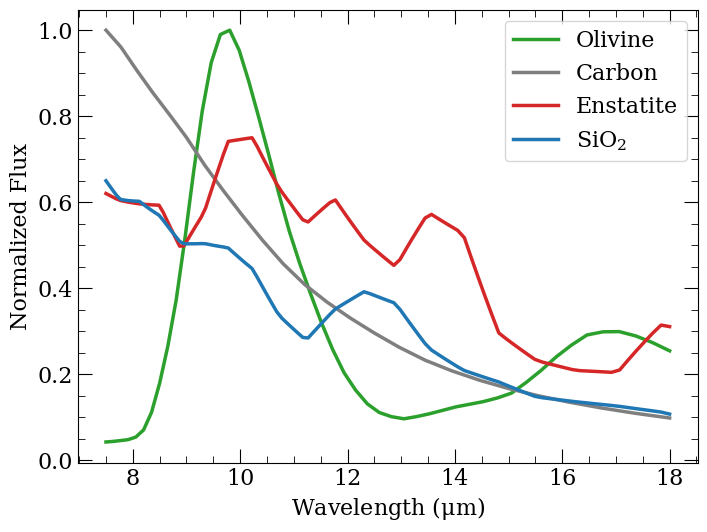

In [78]:
plt.figure(figsize = (8, 6), dpi = 100)

kwargs = dict(lw = 2.5)

dusts = ['olivine', 'carbon', 'enst', 'sio2']
colors = dict(
    olivine = 'tab:green',
    carbon = 'tab:gray',
    enst = 'tab:red',
    sio2 = 'tab:blue'

)

labels = dict(
    olivine = 'Olivine',
    carbon = 'Carbon',
    enst = 'Enstatite',
    sio2 = 'SiO$_2$'

)

for dust in dusts:
    spec = analyze.readSpectrum('%s.out' % dust)
    lam = spec[:, 0]
    fnu = spec[:, 1]
    flux = fnu * lumfact * distfact
    ns = 1/(c1 + c2*lam)
    
    offset = 0
    if dust == 'enst':
        offset = 0.25
    if dust == 'sio2':
        offset = 0.35
    
    plt.plot(lam, flux / np.max(flux) - offset, **kwargs, color = colors[dust], label = labels[dust])
    
plt.legend()
plt.ylabel('Normalized Flux')
plt.xlabel('Wavelength ($\mu$m)')
plt.savefig('../fig/radmc_spec.pdf', bbox_inches = 'tight')

In [ ]:
\